In [1]:
import train as train
import generate
import eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
BASE_DIR = "./tests/x-dim-test"
PROFILE = "test"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

====== Generating profile test ======


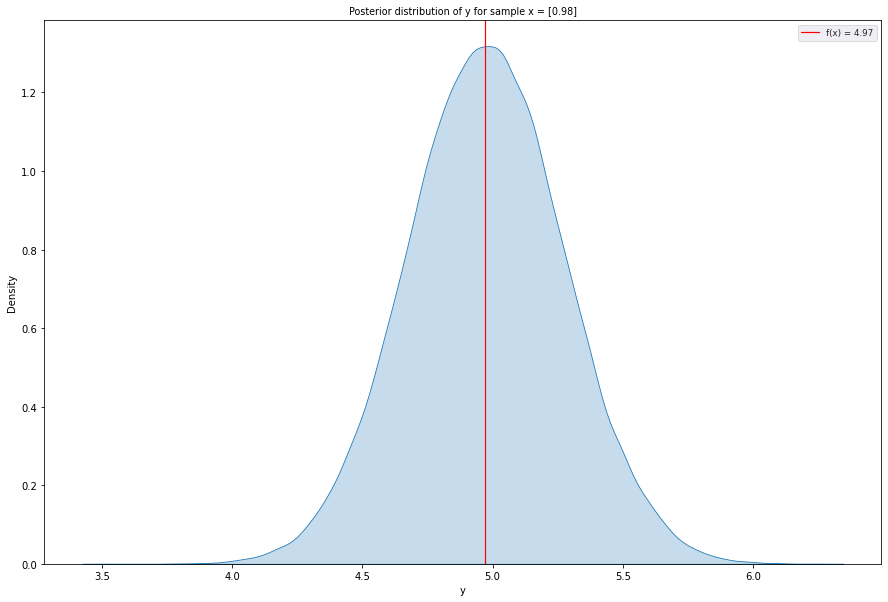

In [4]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [5]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}")

In [6]:
x_train[0], y_train[0]

(tensor([0.9763]), tensor(4.7527))

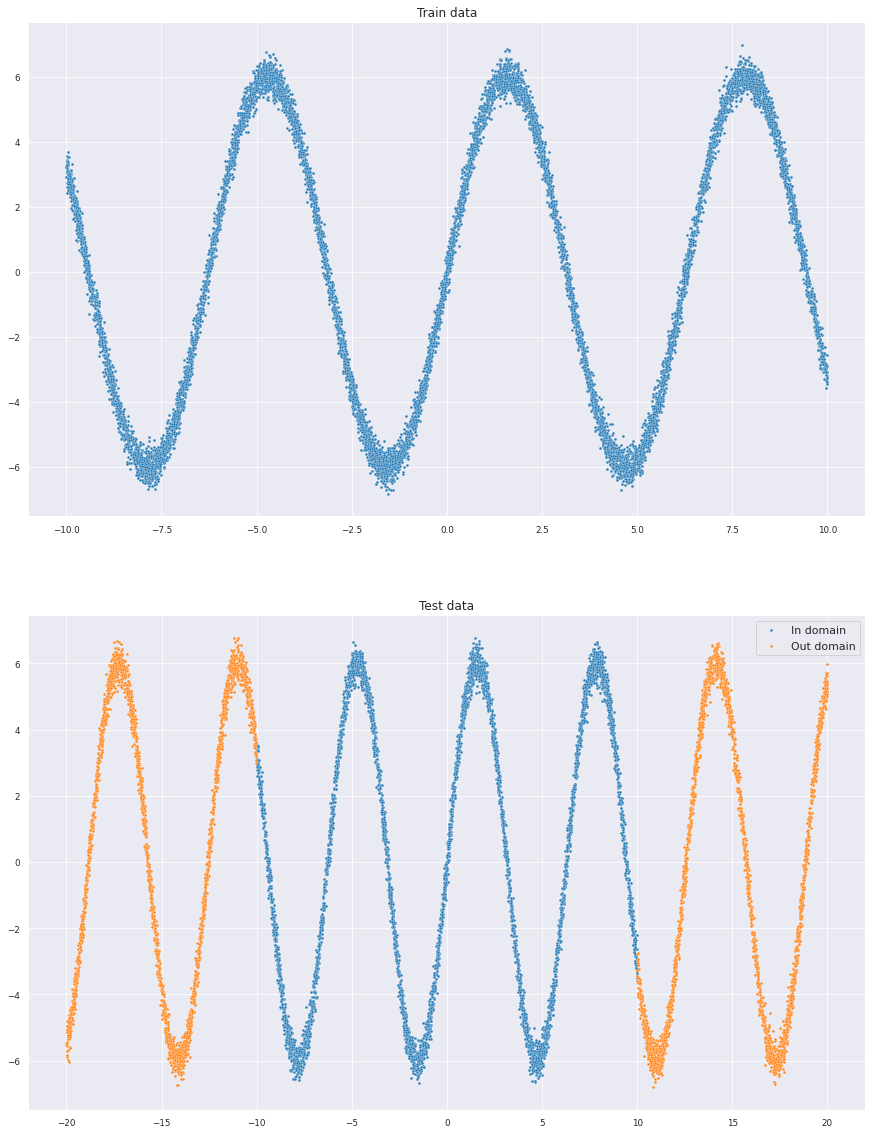

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
sns.set(rc = {'figure.figsize':(20,10)})
sns.scatterplot(x=x_train.flatten(), y=y_train, s=8, ax=ax[0])
ax[0].set_title("Train data")

sns.scatterplot(x=x_test_in_domain.flatten(), y=y_test_in_domain, s=8, ax=ax[1], label="In domain")
sns.scatterplot(x=x_test_out_domain.flatten(), y=y_test_out_domain, s=8, ax=ax[1], label="Out domain")
ax[1].set_title("Test data")
ax[1].legend()




In [8]:
#Min y and max y of the train data
y_min = y_train.min()
y_max = y_train.max()
print(f"y_min: {y_min}, y_max: {y_max}")

y_min: -6.83534049987793, y_max: 6.98775577545166
